In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Constantes para comparação e calculos
electron_mass = 9.10938356e-31
electron_charge = 1.60217662e-19
planck_constant = 6.62607004e-34

In [3]:
#Funções gaussianas e de fit
def fit(data,funct,guess):
    def gaussian_fit(x,A,mean,sigma):
        return A*np.exp(-(x-mean)**2/(2*sigma**2))
    
    #fit gaussian to data
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(gaussian_fit, data, funct(data), p0=guess)
    print("FIT: ",popt)
    return popt

def gaussian(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))


In [4]:
#Função para calcular o produto de massa e carga de um elétron
def calculateME(a,da):
    a = a*1e-9
    da = da*1e-9
    sme = planck_constant/(np.sqrt(2)*a)
    dsme = planck_constant*da/(np.sqrt(2)*a**2)
    return (sme**2,2*sme*dsme)

FIT:  [6.78344238e-01 1.45994876e-49 2.13033926e-51]


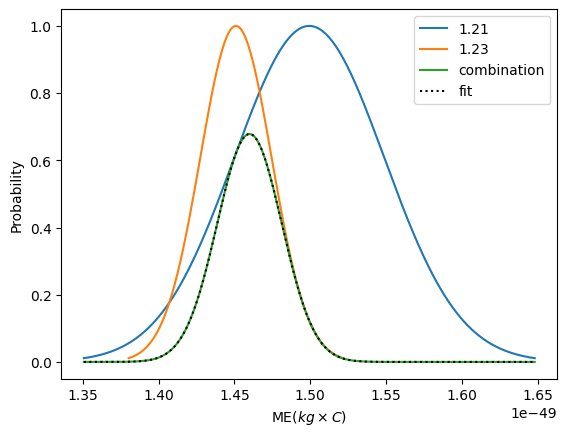

ME: 1.4599487589344352e-49 +/- 2.1303392626422316e-51
VALOR DE REFERENCIA
 1.4594841362444368e-49


In [5]:
# Calculos da Difração de elétrons. Nenhuma gaussiana aqui está normalizada!!
mean_1, sigma_1 = calculateME(1.21,0.02) # D1 
mean_2, sigma_2 = calculateME(1.23,0.01) # D2

fig, ax = plt.subplots()
# Como tinhamos apenas duas gaussianas, fiz o produto delas com uma lambda function
product_gaussians = lambda x: gaussian(x,mean_1,sigma_1)*gaussian(x,mean_2,sigma_2)

x_1 = np.linspace(mean_1-3*sigma_1,mean_1+3*sigma_1,1000)
x_2 = np.linspace(mean_2-3*sigma_2,mean_2+3*sigma_2,1000)
ax.plot(x_1,gaussian(x_1,mean_1,sigma_1),label='1.21')
ax.plot(x_2,gaussian(x_2,mean_2,sigma_2),label='1.23')
ax.plot(x_1,product_gaussians(x_1),label='combination')
ax.set_xlabel(r'ME($kg \times C$)')
ax.set_ylabel('Probability')

x_dif = x_1 #Alias para semantica
#Fit da combinação de gaussianas para determinar a média e o desvio padrão
guesses = [np.max(product_gaussians(x_dif)), x_dif[np.argmax(product_gaussians(x_dif))], sigma_1]
amax_dif, mean_dif, sigma_dif = fit(x_dif,product_gaussians,guesses)
P_difracao = lambda x: amax_dif*gaussian(x,mean_dif,sigma_dif)

#Plota fit da gaussiana combinada para comparação
ax.plot(x_dif,P_difracao(x_dif),"k:",label='fit')
ax.legend()
plt.show()
print("ME:", mean_dif, "+/-", sigma_dif)
print("VALOR DE REFERENCIA\n", electron_mass*electron_charge)


FIT:  [ 1.11114267e-16  1.59850374e-19 -8.93311249e-22]


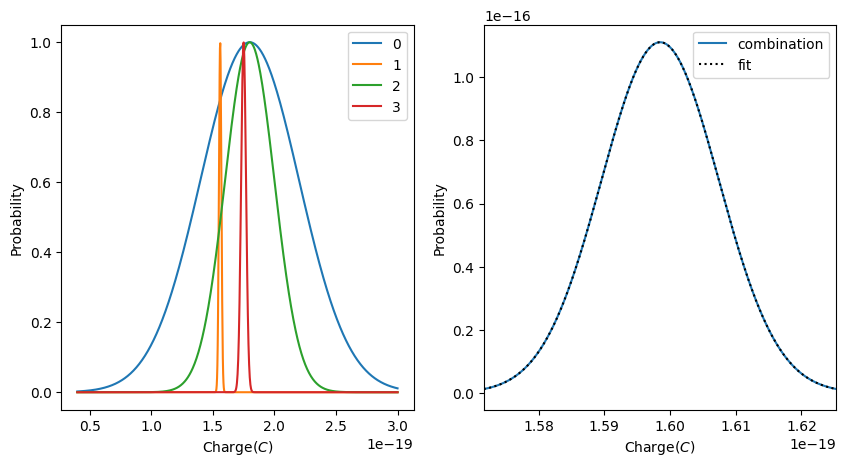

Charge: 1.598503740648379e-19 +/- -8.933112489671067e-22
VALOR DE REFERENCIA
 1.60217662e-19


In [6]:
#Experimento de Planck para determinação da carga do elétron
#Dados: Planck 2 fit, Planck 2 visual, Planck 1 3B fit do gráfico inverso e PASCO
charges = np.array([1.8,1.56,1.8,1.75])*1e-19
errors = np.array([0.4,0.01,0.2,0.02])*1e-19
# charges = np.array([1.8,1.56,1.8])*1e-19
# errors = np.array([0.4,0.01,0.2])*1e-19

#Função para combinar as gaussianas das medidas de carga.
def combination(x):
    y = 1;
    for i in range(len(charges)):
        y*=gaussian(x,charges[i],errors[i])
    return y

#Plot das gaussianas
x = np.linspace(0.4e-19,3e-19,1000)
fig, ax = plt.subplots(1,2,figsize=(10,5))

for i in range(len(charges)):
    ax[0].plot(x,gaussian(x,charges[i],errors[i]),label=str(i))
ax[0].legend()
ax[0].set_xlabel(r'Charge($C$)')
ax[0].set_ylabel('Probability')

#Plota combinação de gaussianas em outro eixo
x_carga = np.linspace(1.57e-19,1.63e-19,1000)
ax[1].plot(x_carga,combination(x_carga),label='combination')
ax[1].set_xlabel(r'Charge($C$)')
ax[1].set_ylabel('Probability')

#Fit da combinação de gaussianas para determinar a média e o desvio padrão
guesses = [np.max(combination(x_carga)), x[np.argmax(combination(x))], errors[0]]
amax_carga, mean_carga, sigma_carga = fit(x_carga,combination,guesses)
P_carga = lambda x: amax_carga*gaussian(x,mean_carga,sigma_carga)

#Plota fit da gaussiana combinada para comparação
ax[1].plot(x_carga,P_carga(x_carga),"k:",label='fit')
ax[1].set_xlim(mean_carga+3*sigma_carga,mean_carga-3*sigma_carga)
ax[1].legend()
plt.show()

print("Charge:", mean_carga, "+/-", sigma_carga)
print("VALOR DE REFERENCIA\n", electron_charge)


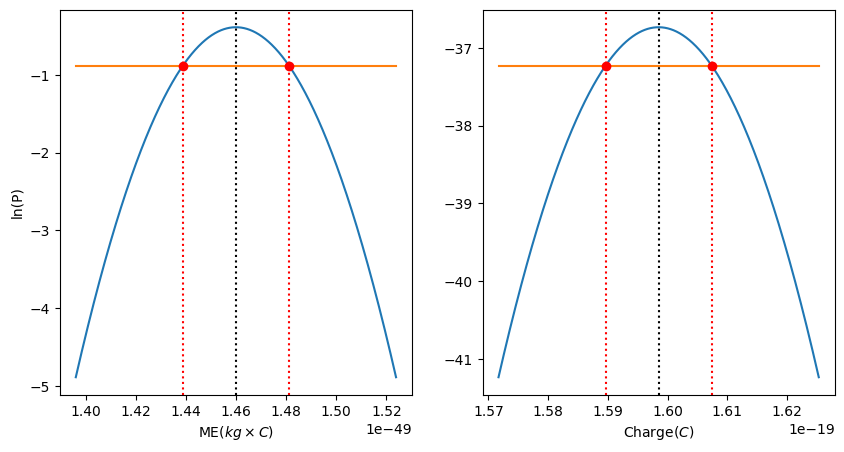

Difração - Mean: 1.4599487589344352e-49
1.4386453663080128e-49 1.4811242032567949e-49
--> 2.123941847439103e-51
Carga - Mean: 1.598503740648379e-19
1.60743685313805e-19 1.589624280485973e-19
--> 8.906286326038472e-22


In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
x_dif = np.linspace(mean_dif-3*sigma_dif,mean_dif+3*sigma_dif,1000)
x_carga = np.linspace(mean_carga-3*sigma_carga,mean_carga+3*sigma_carga,1000)
P_dif = np.log(P_difracao(x_dif))
dif_err_line = np.log(P_difracao([mean_dif]*len(x_dif)))-0.5
idx_dif = np.argwhere(np.diff(np.sign(P_dif - dif_err_line))).flatten()

P_charge = np.log(P_carga(x_carga))
charge_err_line = np.log(P_carga([mean_carga]*len(x_carga)))-0.5
idx_charge = np.argwhere(np.diff(np.sign(P_charge - charge_err_line))).flatten()

ax[0].plot(x_dif,P_dif,label='difração')
ax[0].plot(x_dif,dif_err_line)
ax[0].plot(x_dif[idx_dif], P_dif[idx_dif], 'ro')
ax[0].axvline(x_dif[idx_dif[0]],color='r',linestyle=':')
ax[0].axvline(x_dif[idx_dif[1]],color='r',linestyle=':')
ax[0].axvline(mean_dif,color='k',linestyle=':')

ax[1].plot(x_carga,P_charge,label='carga')
ax[1].plot(x_carga,charge_err_line)
ax[1].plot(x_carga[idx_charge], P_charge[idx_charge], 'ro')
ax[1].axvline(x_carga[idx_charge[0]],color='r',linestyle=':')
ax[1].axvline(x_carga[idx_charge[1]],color='r',linestyle=':')
ax[1].axvline(mean_carga,color='k',linestyle=':')

ax[0].set_ylabel("ln(P)")
ax[0].set_xlabel(r'ME($kg \times C$)')
ax[1].set_xlabel(r'Charge($C$)')
plt.show()
print("Difração - Mean:", mean_dif)
print(x_dif[idx_dif[0]],x_dif[idx_dif[1]])
print("-->",(x_dif[idx_dif[1]]-x_dif[idx_dif[0]])/2)
print("Carga - Mean:", mean_carga)
print(x_carga[idx_charge[0]],x_carga[idx_charge[1]])
print("-->",(x_carga[idx_charge[0]]-x_carga[idx_charge[1]])/2)


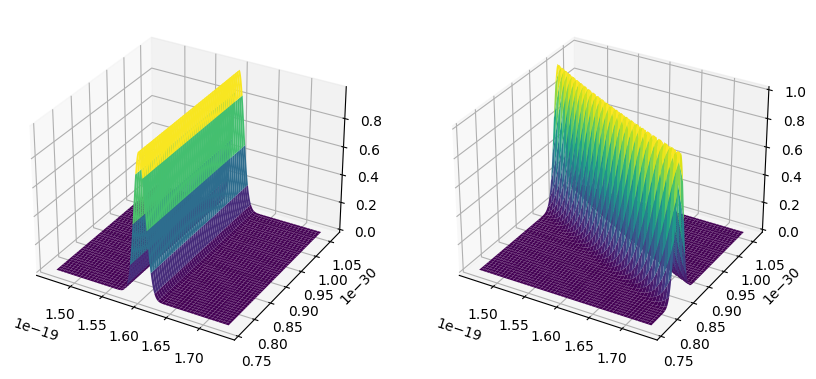

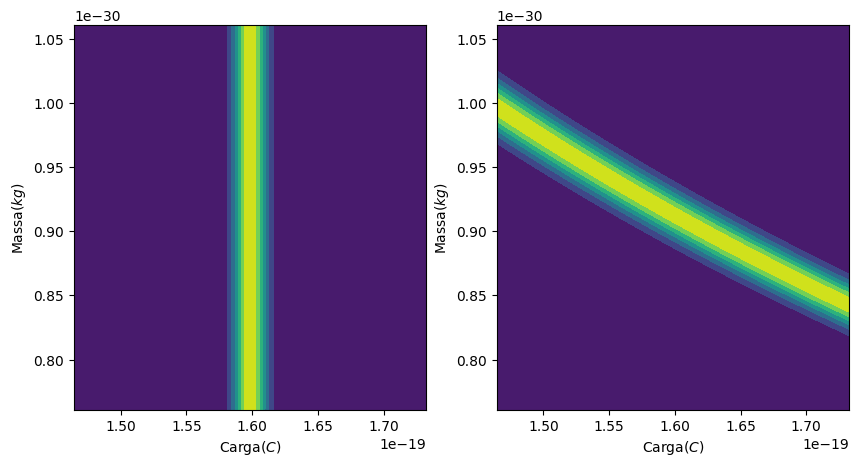

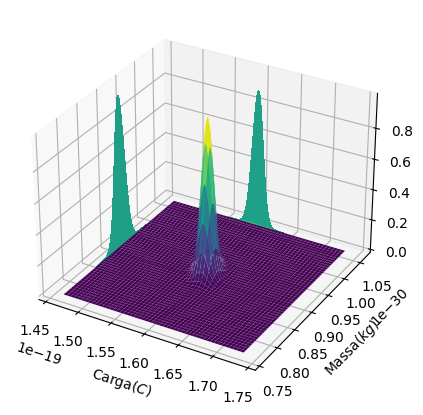

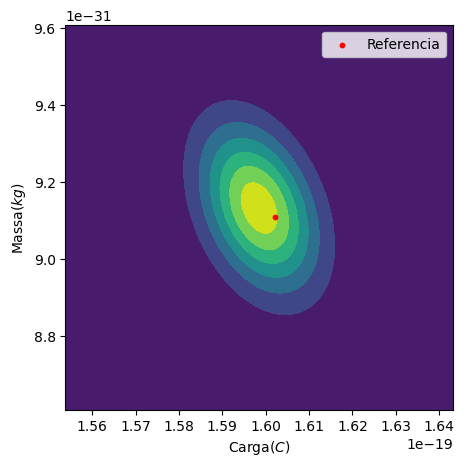

In [8]:
#3D Plot Carga
from matplotlib import cm
X = np.linspace(mean_carga+15*sigma_carga,mean_carga-15*sigma_carga,1000)
Y = np.linspace(electron_mass-1.5e-31,electron_mass+1.5e-31,1000)
X, Y = np.meshgrid(X, Y)
Z_1 = gaussian(X,mean_carga,sigma_carga)
Z_2 = gaussian(X*Y,mean_dif,sigma_dif)
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw={'projection':'3d'})
ax[0].plot_surface(X, Y, Z_1, cmap='viridis')
ax[1].plot_surface(X, Y, Z_2, cmap='viridis')
#Plot 2D
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].contourf(X, Y, Z_1, cmap='viridis')
ax[1].contourf(X, Y, Z_2, cmap='viridis')
ax[0].set_xlabel(r'Carga($C$)')
ax[0].set_ylabel(r'Massa($kg$)')
ax[1].set_xlabel(r'Carga($C$)')
ax[1].set_ylabel(r'Massa($kg$)')

fig, ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection':'3d'})
ax.plot_surface(X, Y, Z_1*Z_2, cmap='viridis')
a = ax.contourf(X, Y, Z_1*Z_2,zdir='x',offset=mean_carga+15*sigma_carga, cmap='viridis')
b = ax.contourf(X, Y, Z_1*Z_2,zdir='y',offset=electron_mass+1.5e-31, cmap='viridis')
ax.set_xlabel(r'Carga($C$)')
ax.set_ylabel(r'Massa($kg$)')

#Plot 2D
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(X, Y, Z_1*Z_2, cmap='viridis')
ax.set_xlabel(r'Carga($C$)')
ax.set_ylabel(r'Massa($kg$)')
ax.scatter(electron_charge,electron_mass,color='r',marker='o',s=10, zorder=10, label="Referencia")
ax.set_xlabel(r'Carga($C$)')
ax.set_ylabel(r'Massa($kg$)')
ax.legend()
ax.set_xlim(mean_carga+5*sigma_carga,mean_carga-5*sigma_carga)
ax.set_ylim(electron_mass-0.5e-31,electron_mass+0.5e-31)
plt.show()


FIT:  [8.96441848e-01 1.59700075e-19 8.33448121e-22]
FIT:  [9.86035058e-01 9.12468035e-31 1.33146839e-32]


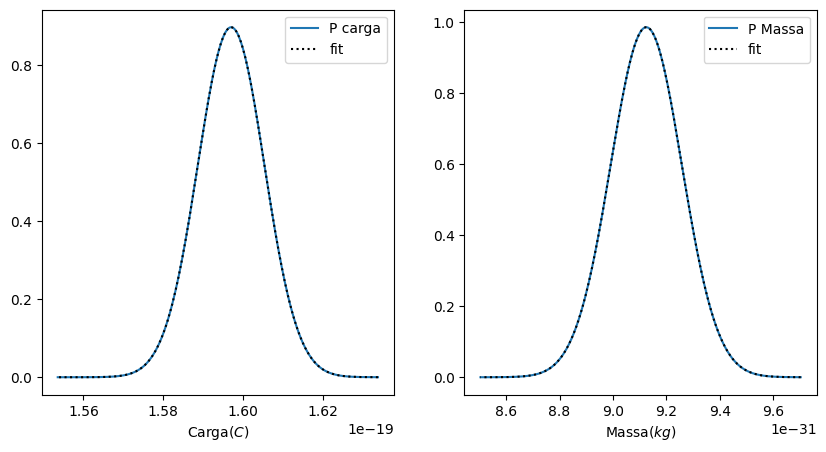

In [9]:
#EU NÃO SEI O QUE FIZ AQUI, mas eu consegui tirar os dados das projeções de alguma maneira(principalmente tentativa e erro)

def fitxy(datax,datay,guess):
    def gaussian_fit(x,A,mean,sigma):
        return A*np.exp(-(x-mean)**2/(2*sigma**2))
    
    #fit gaussian to data
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(gaussian_fit, datax, datay, p0=guess)
    print("FIT: ",popt)
    return popt


fig, ax = plt.subplots(1,2,figsize=(10,5))

c = b.allsegs[3][0]
x_carga = c[1500:1800,1]
y_carga = c[1500:1800,0]
amax_c, mean_c, sigma_c = fitxy(x_carga,y_carga,[1,x_carga[np.argmax(y_carga)],1e-22])

ax[0].plot(x_carga,y_carga, label="P carga")
ax[0].plot(x_carga, amax_c*gaussian(x_carga,mean_c,sigma_c),"k:", label="fit")
ax[0].legend()

d = a.allsegs[4][0]
x_massa = d[1600:2000,0]
y_massa = d[1600:2000,1]
amax_m, mean_m, sigma_m = fitxy(x_massa,y_massa,[1,x_massa[np.argmax(y_massa)],1e-32])

ax[1].plot(x_massa,y_massa, label="P Massa")
ax[1].plot(x_massa, amax_m*gaussian(x_massa,mean_m,sigma_m), "k:", label="fit")
ax[1].legend()


ax[0].set_xlabel(r'Carga($C$)')
ax[1].set_xlabel(r'Massa($kg$)')
plt.show()



Incerteza Carga+:  8.316110726120114e-22 Carga-:  8.316110726120354e-22
Incerteza Massa+:  1.321321321321324e-32 Massa-:  1.321321321321324e-32
Carga:  1.5970283016485835e-19 +/- 8.316110726120114e-22
Massa:  9.125900076516516e-31 +/- 1.321321321321324e-32


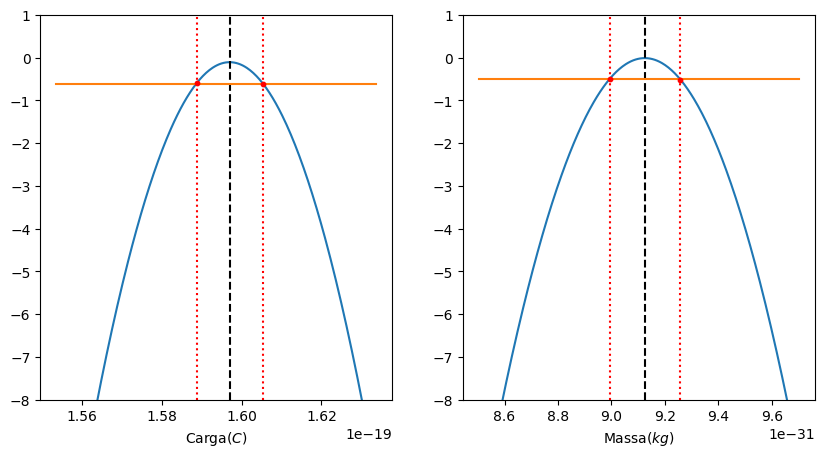

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
log_carga = np.log(y_carga)
log_massa = np.log(y_massa)
media_carga = np.max(log_carga)
media_massa = np.max(log_massa)
carga_line = np.array([media_carga - 0.5]*len(x_carga))
massa_line = np.array([media_massa - 0.5]*len(x_massa))
x_media_carga = x_carga[np.argmax(log_carga)]
x_media_massa = x_massa[np.argmax(log_massa)]
idx_carga = np.argwhere(np.diff(np.sign(log_carga - carga_line))).flatten()
idx_massa = np.argwhere(np.diff(np.sign(log_massa - massa_line))).flatten()

ax[0].plot(x_carga,log_carga)
ax[0].axvline(x_media_carga,color='k',linestyle='--')
ax[0].scatter(x_carga[idx_carga],log_carga[idx_carga],color='r',marker='o',s=10, zorder=10)
ax[0].plot(x_carga,carga_line)
ax[0].axvline(x_carga[idx_carga[0]],color='r',linestyle=':')
ax[0].axvline(x_carga[idx_carga[1]],color='r',linestyle=':')

ax[1].plot(x_massa,log_massa)
ax[1].axvline(x_media_massa,color='k',linestyle='--')
ax[1].scatter(x_massa[idx_massa],log_massa[idx_massa],color='r',marker='o',s=10, zorder=10)
ax[1].plot(x_massa,massa_line)
ax[1].axvline(x_massa[idx_massa[0]],color='r',linestyle=':')
ax[1].axvline(x_massa[idx_massa[1]],color='r',linestyle=':')

ax[0].set_xlabel(r'Carga($C$)')
ax[1].set_xlabel(r'Massa($kg$)')
ax[0].set_ylim(-8,1)
ax[1].set_ylim(-8,1)


#Calculo da incerteza
incerteza_carga_mais = x_carga[idx_carga[0]] - x_media_carga
incerteza_carga_menos = x_media_carga - x_carga[idx_carga[1]]
incerteza_massa_mais = x_massa[idx_massa[0]] - x_media_massa
incerteza_massa_menos = x_media_massa - x_massa[idx_massa[1]]
#Checando vi que as incertezas eram praticamente iguais, então usei só uma delas
print("Incerteza Carga+: ",incerteza_carga_mais, "Carga-: ",incerteza_carga_menos)
print("Incerteza Massa+: ",incerteza_massa_mais, "Massa-: ",incerteza_massa_menos)


print("Carga: ",x_media_carga,"+/-",incerteza_carga_mais)
print("Massa: ",x_media_massa,"+/-",incerteza_massa_mais)

[1.1989443184361528e-36, 0.1592184368737475, 0.0028]
FIT:  [1.19919253e-36 1.59233634e-01 7.46903057e-04]
e/m: 1.5923e+11 +/- 7.77e+08
Referência = 1.76e+11
e/m: 1.8033e+11 +/- 3.52e+09


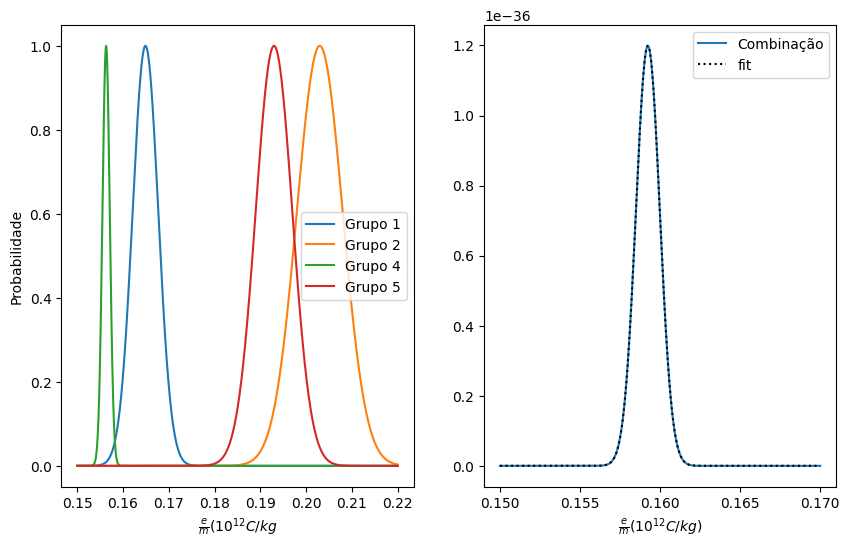

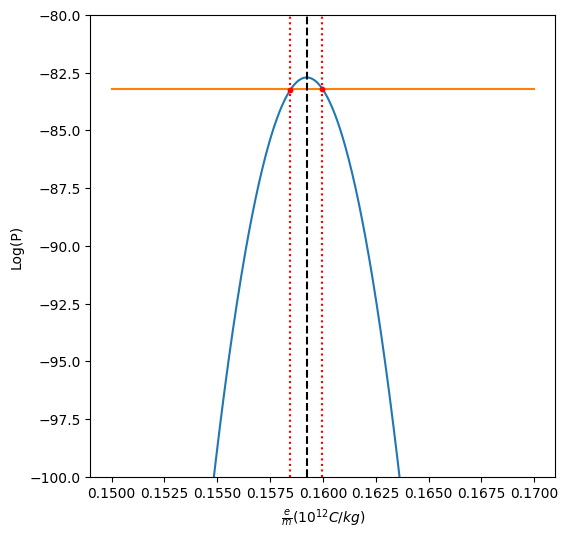

In [13]:
e_over_m = np.array([0.1649,0.203,0.1563,0.193])
e_over_m_err = np.array([0.0028,0.005,0.0008,0.004])

def combination(x):
    y = 1
    for i in range(len(e_over_m)):
        y*=gaussian(x,e_over_m[i],e_over_m_err[i])
    return y

x = np.linspace(0.15,0.22,1000)
fig, ax = plt.subplots(1,2,figsize=(10,6))
for i in range(len(e_over_m)):
    label = f'Grupo {i+1}' if i<=1 else f'Grupo {i+2}'
    ax[0].plot(x,gaussian(x,e_over_m[i],e_over_m_err[i]), label=label)
ax[0].legend()
ax[0].set_xlabel(r'$\frac{e}{m} (10^{12}C/kg$')

x_comb = np.linspace(0.15,0.17,500)
guesses = [np.max(combination(x_comb)),x_comb[np.argmax(combination(x_comb))], e_over_m_err[0]]
print(guesses)
amax_eom, mean_eom, sigma_eom = fit(x_comb, combination, guesses)
P_eom = lambda x: amax_eom*gaussian(x,mean_eom,sigma_eom)
ax[1].plot(x_comb,combination(x_comb), label = "Combinação")
ax[1].plot(x_comb, P_eom(x_comb) , "k:", label="fit")
ax[1].legend()
ax[1].set_xlabel(r'$\frac{e}{m} (10^{12}C/kg)$')
ax[0].set_ylabel("Probabilidade")

fig, ax = plt.subplots(1,1,figsize=(6,6))

logP_eom = np.log(combination(x_comb))
logP_eom_line = np.array([np.max(logP_eom) - 0.5]*len(x_comb))
idx_eom = np.argwhere(np.diff(np.sign(logP_eom - logP_eom_line))).flatten()
ax.plot(x_comb,logP_eom)
ax.plot(x_comb,logP_eom_line)
ax.axvline(mean_eom,color='k',linestyle='--')
ax.scatter(x_comb[idx_eom],logP_eom[idx_eom],color='r',marker='o',s=10, zorder=10)
ax.axvline(x_comb[idx_eom[0]],color='r',linestyle=':')
ax.axvline(x_comb[idx_eom[1]],color='r',linestyle=':')
ax.set_xlabel(r'$\frac{e}{m} (10^{12}C/kg)$')
ax.set_ylabel("Log(P)")
ax.set_ylim(-100,-80)

print(f"e/m: {mean_eom*1e12:.4e} +/- {(mean_eom-x_comb[idx_eom[0]])*1e12:.2e}")
print(f'Referência = {electron_charge/electron_mass:.2e}')

#using rms to calculate e/m
e_over_m_rms = np.sqrt(np.sum(e_over_m**2)/len(e_over_m))
e_over_m_rms_err = np.sqrt(np.sum(e_over_m_err**2)/len(e_over_m_err))
print(f"e/m: {e_over_m_rms*1e12:.4e} +/- {e_over_m_rms_err*1e12:.2e}")



FIT:  [7.23046433e-47 1.46616579e-19 6.18219962e-22]
Valor da carga: 1.4661657914198016e-19 +/- 6.182199623783454e-22 C
FIT:  [2.31675497e-04 1.54024062e-19 1.48044831e-21]
Valor da carga: 1.5402406242841014e-19 +/- 1.4804483071344353e-21 C


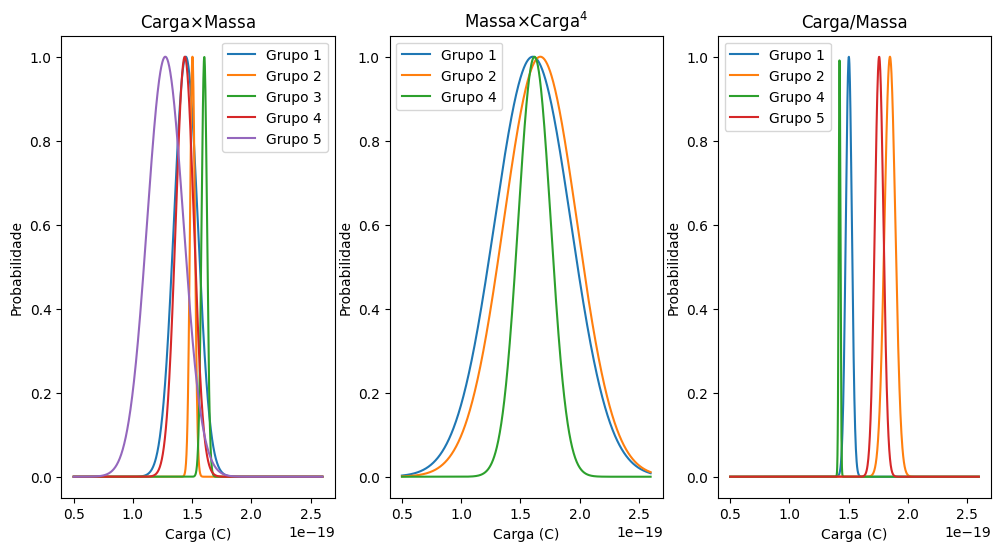

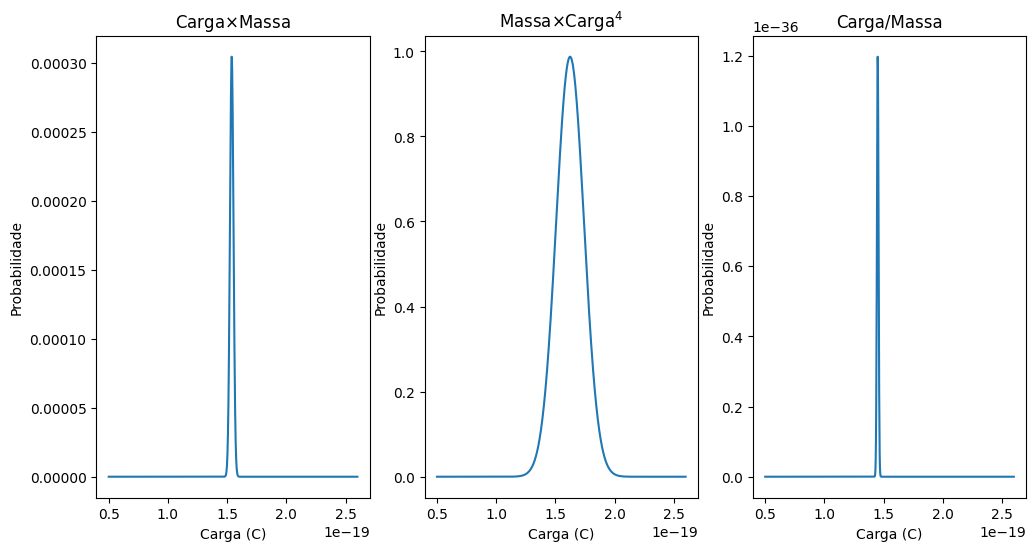

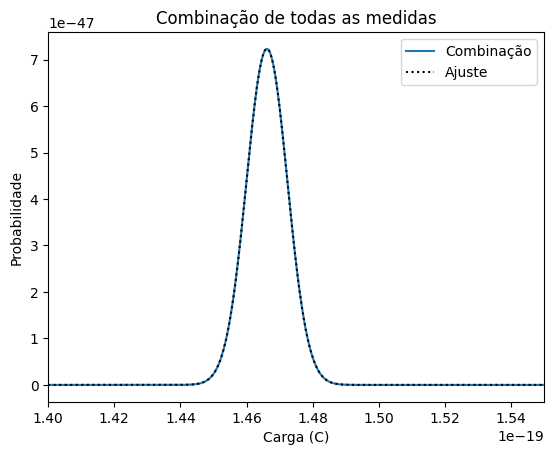

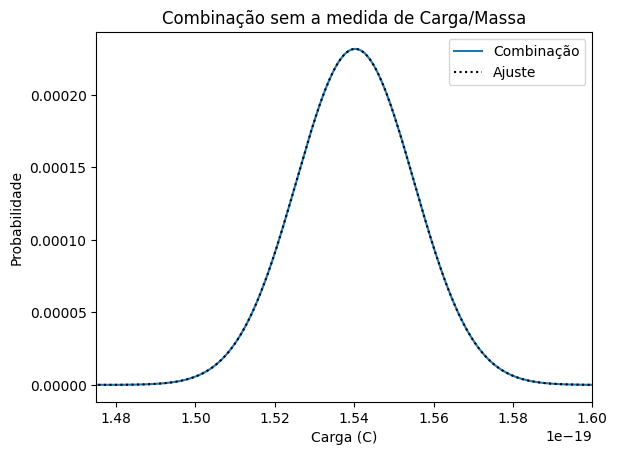

In [48]:
em = np.array([13.18,13.69,14.60,13.1,11.6])*1e-50*1/electron_mass
em_err = np.array([0.92,0.19,0.21,0.7,1.4])*1e-50*1/electron_mass
me4 = np.array([60.362,70.604,62.6139])*1e-107*1/electron_mass
me4_err = np.array([0.098,0.084,0.0033])*1e-107*1/electron_mass
me4 = me4**(1/4)
me4_err = me4_err**(1/4)
eom_times_m = e_over_m*1e12*electron_mass
eom_times_m_err = e_over_m_err*1e12*electron_mass
#concatenate data
eletron_carga = [em,me4,eom_times_m]
eletron_err = [em_err,me4_err,eom_times_m_err]
#plot data
x_carga = np.linspace(0.5*1e-19,2.6*1e-19,1000)
def combination(x,arr,err):
    y = 1
    for i in range(len(arr[:])):
        y*=gaussian(x,arr[i],err[i])
    return y
fig, ax = plt.subplots(1,3,figsize=(12,6))

grupos = ["Grupo 1","Grupo 2","Grupo 3","Grupo 4","Grupo 5"]
for i in range(len(em)):
    ax[0].plot(x_carga,gaussian(x_carga,em[i],em_err[i]), label=f"{grupos[i]}")
    ax[0].legend()
    ax[0].set_title(r"Carga$\times$Massa")
    ax[0].set_xlabel("Carga (C)")
    ax[0].set_ylabel("Probabilidade")

grupos = ["Grupo 1","Grupo 2","Grupo 4"]
for i in range(len(me4)):
    ax[1].plot(x_carga,gaussian(x_carga,me4[i],me4_err[i]), label=f"{grupos[i]}")
    ax[1].legend()
    ax[1].set_title(r"Massa$\times$Carga$^4$")
    ax[1].set_xlabel("Carga (C)")
    ax[1].set_ylabel("Probabilidade")

grupos = ["Grupo 1","Grupo 2","Grupo 4","Grupo 5"]
for i in range(len(eom_times_m)):
    ax[2].plot(x_carga,gaussian(x_carga,eom_times_m[i],eom_times_m_err[i]), label=f"{grupos[i]}")
    ax[2].legend()
    ax[2].set_title(r"Carga/Massa")
    ax[2].set_xlabel("Carga (C)")
    ax[2].set_ylabel("Probabilidade")



fig, ax = plt.subplots(1,3,figsize=(12,6))
legenda = [r"Carga$\times$Massa", r"Massa$\times$Carga$^4$", r"Carga/Massa"]
for i in range(len(eletron_carga)):
    ax[i].plot(x_carga,combination(x_carga,eletron_carga[i],eletron_err[i]), label=f"e: {i}")
    ax[i].set_title(legenda[i])
    ax[i].set_xlabel("Carga (C)")
    ax[i].set_ylabel("Probabilidade")


concatecao = np.concatenate(eletron_carga)
concatecao_err = np.concatenate(eletron_err)
fig, ax = plt.subplots()
x_comb = np.linspace(1.4*1e-19,1.6*1e-19,1000)
P_comb = lambda x: combination(x,concatecao,concatecao_err)
ax.plot(x_comb, P_comb(x_comb), label = "Combinação")
ax.set_xlabel("Carga (C)")
ax.set_ylabel("Probabilidade")
ax.set_title("Combinação de todas as medidas")
ax.set_xlim(1.4e-19,1.55e-19)

guesses = [np.max(P_comb(x_comb)),x_comb[np.argmax(P_comb(x_comb))],1e-22]
amax, mean, sigma = fit(x_comb, P_comb, guesses)
ax.plot(x_comb,amax*gaussian(x_comb,mean,sigma), "k:", label = "Ajuste")
ax.legend()
print(f"Valor da carga: {mean} +/- {sigma} C")

eletron_carga = [em,me4]
eletron_err = [em_err,me4_err]

concatecao = np.concatenate(eletron_carga)
concatecao_err = np.concatenate(eletron_err)
fig, ax = plt.subplots()
x_comb = np.linspace(1.4*1e-19,1.6*1e-19,1000)
P_comb = lambda x: combination(x,concatecao,concatecao_err)
ax.plot(x_comb, P_comb(x_comb), label = "Combinação")
ax.set_xlabel("Carga (C)")
ax.set_ylabel("Probabilidade")
ax.set_title("Combinação sem a medida de Carga/Massa")
ax.set_xlim(1.475e-19,1.6e-19)

guesses = [np.max(P_comb(x_comb)),x_comb[np.argmax(P_comb(x_comb))],1e-22]
amax, mean, sigma = fit(x_comb, P_comb, guesses)
ax.plot(x_comb,amax*gaussian(x_comb,mean,sigma), "k:", label = "Ajuste")
ax.legend()
print(f"Valor da carga: {mean} +/- {sigma} C")